<a href="https://colab.research.google.com/github/yuhannie7/AI_in_tranportation/blob/main/%E2%80%9CExercise_4_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading & preparing data


In [3]:
import pandas as pd

import os


url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

df = pd.read_csv(url)

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()


,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


# Visualize dataset

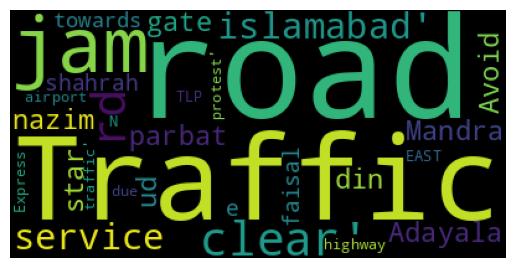

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = df['Text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Data Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2109 non-null   object
 1   Sentiment  2109 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.1+ KB


In [6]:
# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1010   1008                   Traffic open at shahrah e faisal    2
1          1099   1079  Road is closed for traffic at star gate toward...    3

In [7]:
# Delete the duplicate rows
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1008   1008                              Adayala road is clear    1
1          1079   1079  Traffic jam from parbat rd to nazim-ud-din rd ...    1

# Exercise - Assignment task-Find the best text classification model for the sentimental analysis (assignment submission)

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import os

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


# Term Frequency - Inverse Document Frequency Vectorizer

## Logistic Regression

{'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}
Logistic Regression Accuracy: 0.9545454545454546


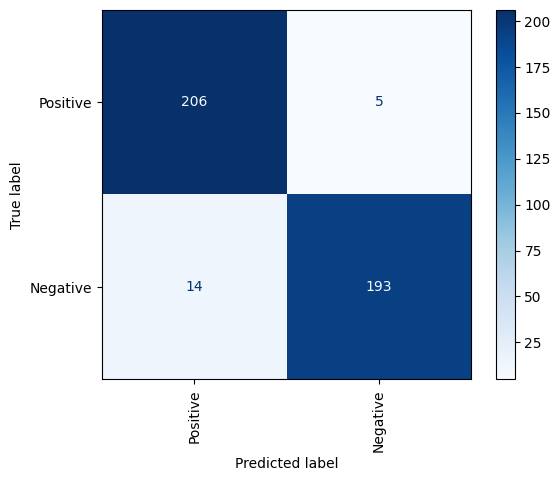

In [14]:

vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
)


x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)


logreg = LogisticRegression(max_iter=1000, random_state=0)


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 500, 1000]
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_vectorized, y_train)

print(grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:', accuracy)

ConfusionMatrixDisplay.from_estimator(
    best_model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.show()

# K-Nearest Neighbor

{'n_neighbors': 5, 'weights': 'distance'}
K-Nearest Neighbor accuracy：0.9330143540669856


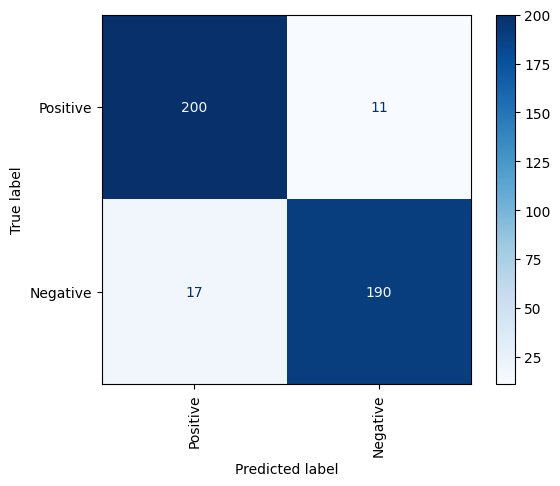

In [19]:
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
)

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_vectorized, y_train)

print(grid_search.best_params_)

best_knn_model = grid_search.best_estimator_

y_pred = best_knn_model.predict(x_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print('K-Nearest Neighbor accuracy：'+ str(accuracy))

ConfusionMatrixDisplay.from_estimator(
    best_knn_model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.show()

# Random Forest

{'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
RF accuracy: 0.9641148325358851


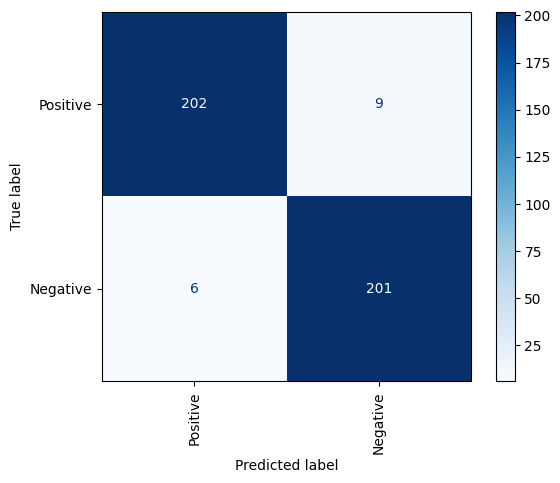

In [21]:
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
)

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

rf = RandomForestClassifier(random_state=0)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_vectorized, y_train)

print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(x_test_vectorized)


accuracy = accuracy_score(y_test, y_pred)
print('RF accuracy: ' + str(accuracy))


ConfusionMatrixDisplay.from_estimator(
    best_rf_model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.show()


## XGBoost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:39:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
XGBoost accuracy: 0.9712918660287081


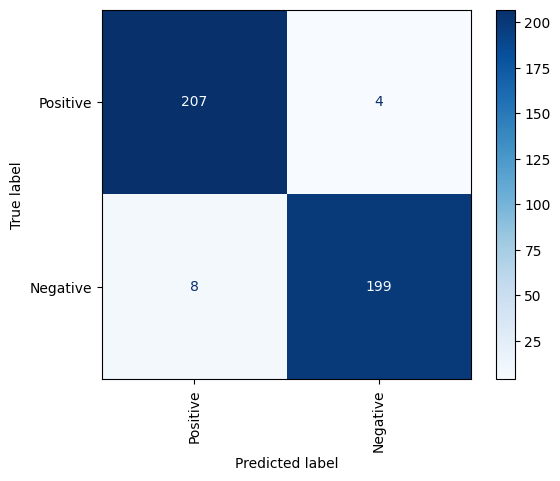

In [23]:
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
)

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_vectorized, y_train)

print(grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_

y_pred = best_xgb_model.predict(x_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print('XGBoost accuracy: ' + str(accuracy))

ConfusionMatrixDisplay.from_estimator(
    best_xgb_model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.show()


## Support Vector Machine

{'C': 0.1, 'kernel': 'rbf'}
SVM accuracy: 0.9593301435406698


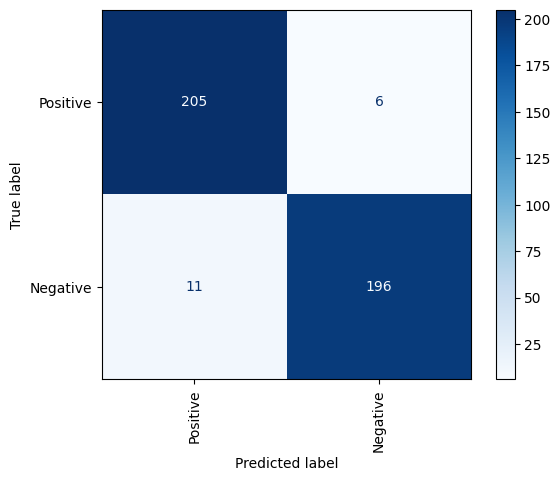

In [24]:
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

model= SVC(probability=True)

param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train_vectorized, y_train)

best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

model = grid_search.best_estimator_

cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

print('SVM accuracy: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

## Naive Bayes

{'alpha': 1, 'force_alpha': True}
The accuracy of the model is: 0.9401913875598086


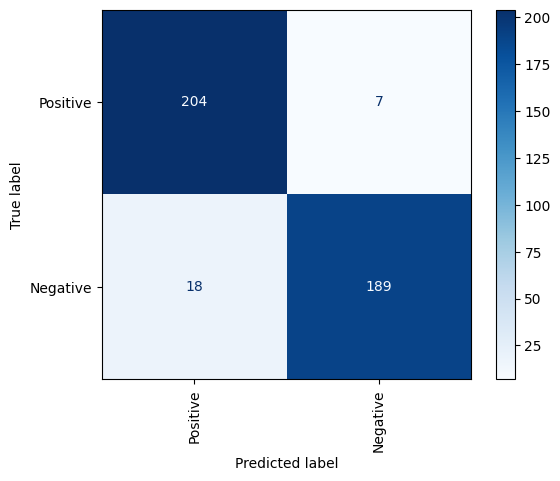

In [29]:
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

model = BernoulliNB()
param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train_vectorized, y_train)

best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

model = grid_search.best_estimator_

cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

accuracy_nb_count = accuracy_score(y_test,model.predict(x_test_vectorized))
print('The accuracy of the model is: '+str(accuracy_nb_count))

# Hashing Vectorizer

Logistic Regression

{'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.9904306220095693


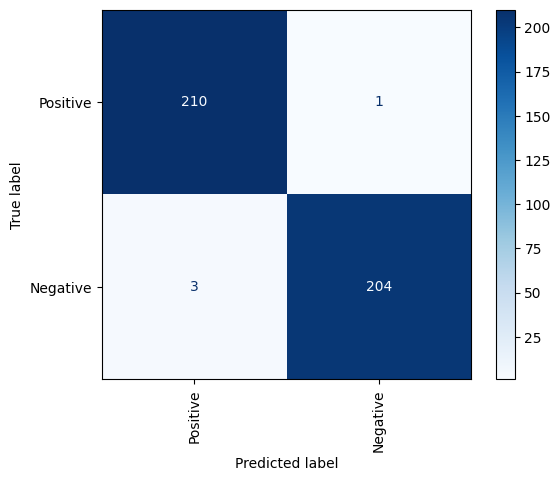

In [30]:
vectorizer = HashingVectorizer(
    n_features=2**20,
    norm='l2',
    alternate_sign=False
)


x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)


logreg = LogisticRegression(max_iter=1000, random_state=0)


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 500, 1000]
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_vectorized, y_train)

print(grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:', accuracy)

ConfusionMatrixDisplay.from_estimator(
    best_model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.show()


## K-Nearest Neighbor

{'n_neighbors': 9, 'weights': 'uniform'}
K-Nearest Neighbor accuracy：0.9521531100478469


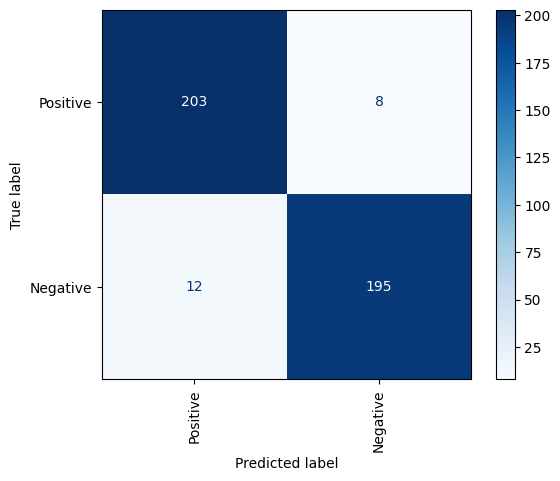

In [31]:
vectorizer = HashingVectorizer(
    n_features=2**20,
    norm='l2',
    alternate_sign=False
)

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_vectorized, y_train)

print(grid_search.best_params_)

best_knn_model = grid_search.best_estimator_

y_pred = best_knn_model.predict(x_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print('K-Nearest Neighbor accuracy：'+ str(accuracy))

ConfusionMatrixDisplay.from_estimator(
    best_knn_model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.show()

## Support Vector Machine

{'C': 10, 'kernel': 'linear'}
SVM accuracy: 0.9880382775119617


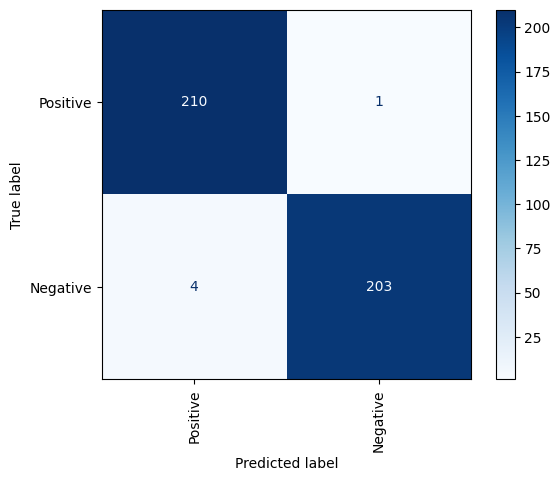

In [35]:
vectorizer = HashingVectorizer(
    n_features=2**20,
    norm='l2',
    alternate_sign=False
)

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

model= SVC(probability=True)

param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train_vectorized, y_train)

best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

model = grid_search.best_estimator_

cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

print('SVM accuracy: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

## Naive Bayes

{'alpha': 0.1, 'force_alpha': True}
The accuracy of the model is: 0.5741626794258373


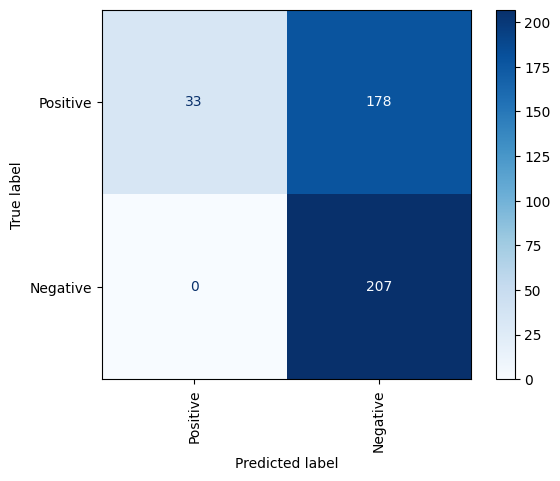

In [36]:
vectorizer = HashingVectorizer(
    n_features=2**20,
    norm='l2',
    alternate_sign=False
)

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

model = BernoulliNB()
param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train_vectorized, y_train)

best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

model = grid_search.best_estimator_

cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

accuracy_nb_count = accuracy_score(y_test,model.predict(x_test_vectorized))
print('The accuracy of the model is: '+str(accuracy_nb_count))

# Count Vectorizer

Logistic Regression

{'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}
Logistic Regression Accuracy: 0.937799043062201


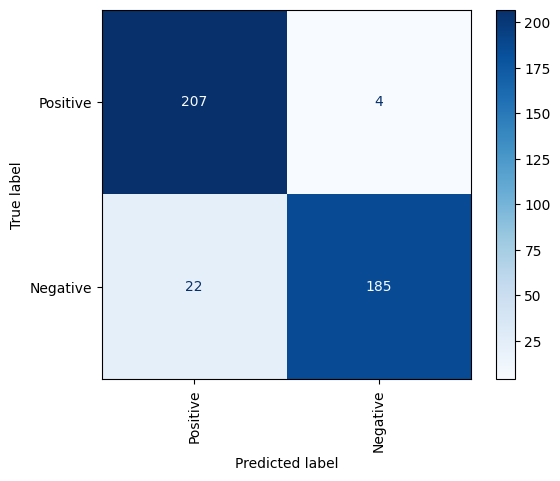

In [37]:
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)


x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)


logreg = LogisticRegression(max_iter=1000, random_state=0)


param_grid = {
    'C': [0.01, 0.1, 1],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 500, 1000]
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_vectorized, y_train)

print(grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:', accuracy)

ConfusionMatrixDisplay.from_estimator(
    best_model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.show()


## K-Nearest Neighbor

{'n_neighbors': 5, 'weights': 'uniform'}
K-Nearest Neighbor accuracy：0.9473684210526315


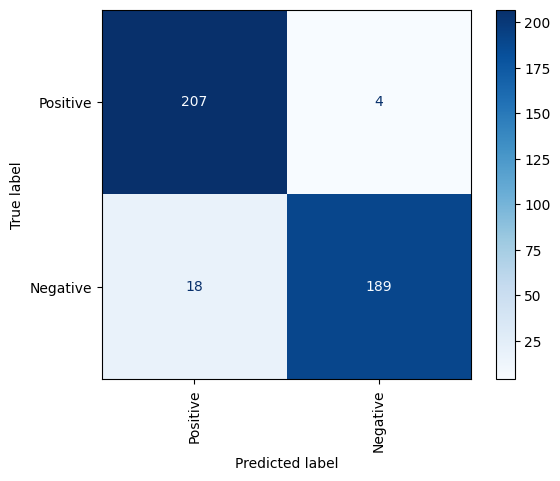

In [38]:
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)


x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_vectorized, y_train)

print(grid_search.best_params_)

best_knn_model = grid_search.best_estimator_

y_pred = best_knn_model.predict(x_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print('K-Nearest Neighbor accuracy：'+ str(accuracy))

ConfusionMatrixDisplay.from_estimator(
    best_knn_model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.show()

## Random Forest

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
RF accuracy: 0.9641148325358851


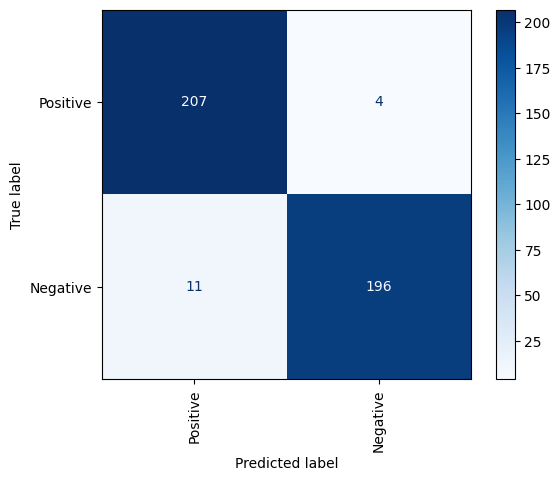

In [39]:
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)


x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

rf = RandomForestClassifier(random_state=0)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [20, 30, None],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_vectorized, y_train)

print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(x_test_vectorized)


accuracy = accuracy_score(y_test, y_pred)
print('RF accuracy: ' + str(accuracy))


ConfusionMatrixDisplay.from_estimator(
    best_rf_model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.show()


## XGBoost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:34:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200}
XGBoost accuracy: 0.9593301435406698


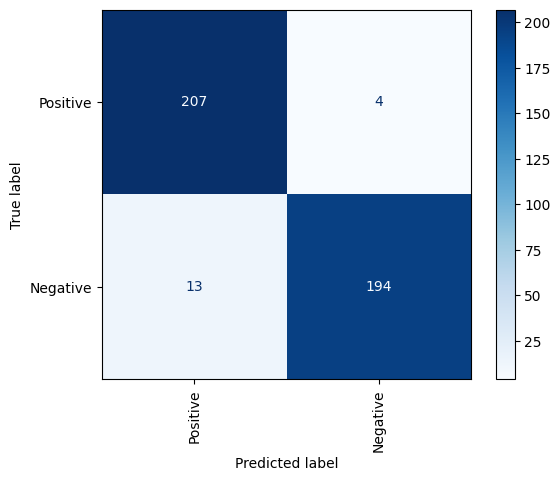

In [40]:
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)


x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_vectorized, y_train)

print(grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_

y_pred = best_xgb_model.predict(x_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print('XGBoost accuracy: ' + str(accuracy))

ConfusionMatrixDisplay.from_estimator(
    best_xgb_model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.show()


## Support Vector Machine

{'C': 10, 'kernel': 'rbf'}
SVM accuracy: 0.9569377990430622


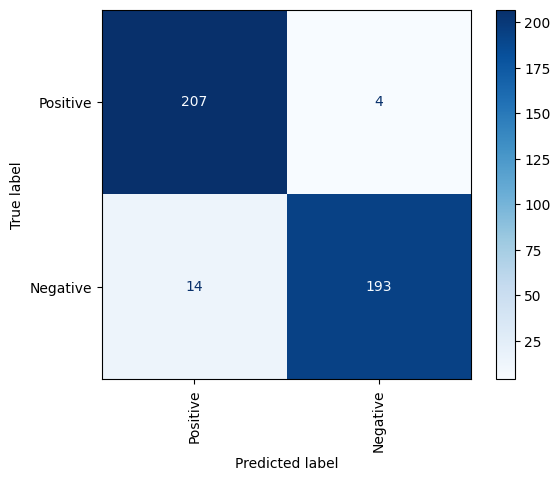

In [41]:
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)


x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

model= SVC(probability=True)

param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train_vectorized, y_train)

best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

model = grid_search.best_estimator_

cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

print('SVM accuracy: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

## Naive Bayes

{'alpha': 1, 'force_alpha': True}
The accuracy of the model is: 0.9425837320574163


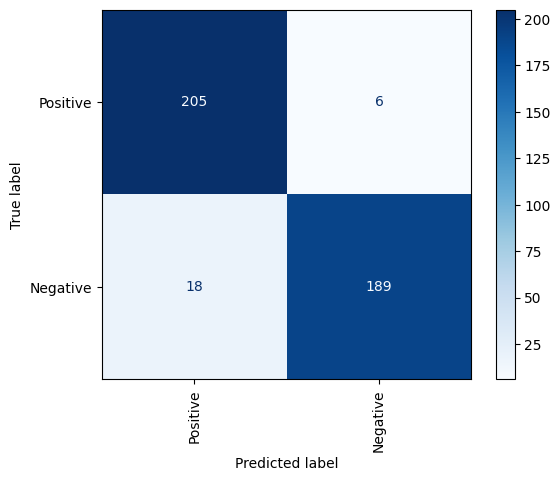

In [42]:
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

model = BernoulliNB()
param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train_vectorized, y_train)

best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

model = grid_search.best_estimator_

cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

accuracy_nb_count = accuracy_score(y_test,model.predict(x_test_vectorized))
print('The accuracy of the model is: '+str(accuracy_nb_count))